# Imports and loading data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [53]:
df = pd.read_csv('../Data/Clean_Data.csv',index_col = False, parse_dates=['Datetime'])

In [54]:
df.head(10)

,Content ID,Type_Reaction,Datetime,Type_Content,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy Eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy Eating,negative,0
5,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-14 07:21:32,video,Dogs,negative,0
6,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-13 23:35:56,video,Dogs,negative,0
7,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:20,video,Dogs,negative,0
8,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:22,photo,Public Speaking,negative,0
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-02-13 04:14:45,photo,Public Speaking,negative,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Type_Reaction  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Type_Content   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ MB


# Visualizations

In [56]:
def counter(Category, df):
    _df = df[Category].value_counts().head(5)
    _df.sort_values(inplace=True)
    plt.figure(figsize=(10,10))
    plt.barh(_df.index, _df)
    for i, count in enumerate(_df):
        plt.text(count, i, str(count), va='center')
    plt.xlabel('Count')
    plt.ylabel(f'{Category}')
    plt.title(f'Top 5 {Category} Counts')
    plt.tight_layout()
    plt.savefig(f'../Images/barh_{Category}.png')
    plt.show()

In [57]:

def stack_bar_chart(Category, df, sort):
    counts_df = pd.DataFrame(columns=df['Datetime'].dt.year.unique())

    for year in df['Datetime'].dt.year.unique():
        year_df = df[df['Datetime'].dt.year == year]
        counts = year_df[Category].value_counts()
        counts_df[year] = counts

    # Calculate the sum for each category
    counts_df['Sum'] = counts_df.sum(axis=1)

    # Sort the DataFrame by the 'Sum' column
    counts_df = counts_df.sort_values(by=sort, axis=0)
    counts_df = counts_df.tail(5)
    ax = counts_df.drop('Sum', axis=1).plot(kind='barh', stacked=True, figsize=(10, 10), width=0.8)

    # Add labels and title

    ax.set_xlabel('Count')
    ax.set_ylabel(f'{Category}')
    ax.set_title(f'Top 5 {Category} Counts by {sort}')
    
    #This portion was assisted by chatgpt to annotate the stack bar chart
    # Display the count text
    for i, count in enumerate(counts_df.index):
        for j, value in enumerate(counts_df.loc[count]):
            if not pd.isna(value) and value > 0:
                ax.text(value, i, str(value), va='center')

    # Display the sum as text at the end of each bar
    for i, sum_value in enumerate(counts_df['Sum']):
        if not pd.isna(sum_value) and sum_value > 0:
            ax.text(sum_value, i, str(sum_value), va='center', ha='left')  # Adjust ha to control horizontal alignment

    plt.tight_layout()
    # Save the image with text
    plt.savefig(f'../Images/stacked_{Category}_{sort}.png')
    plt.show()

## Count of reactions per category

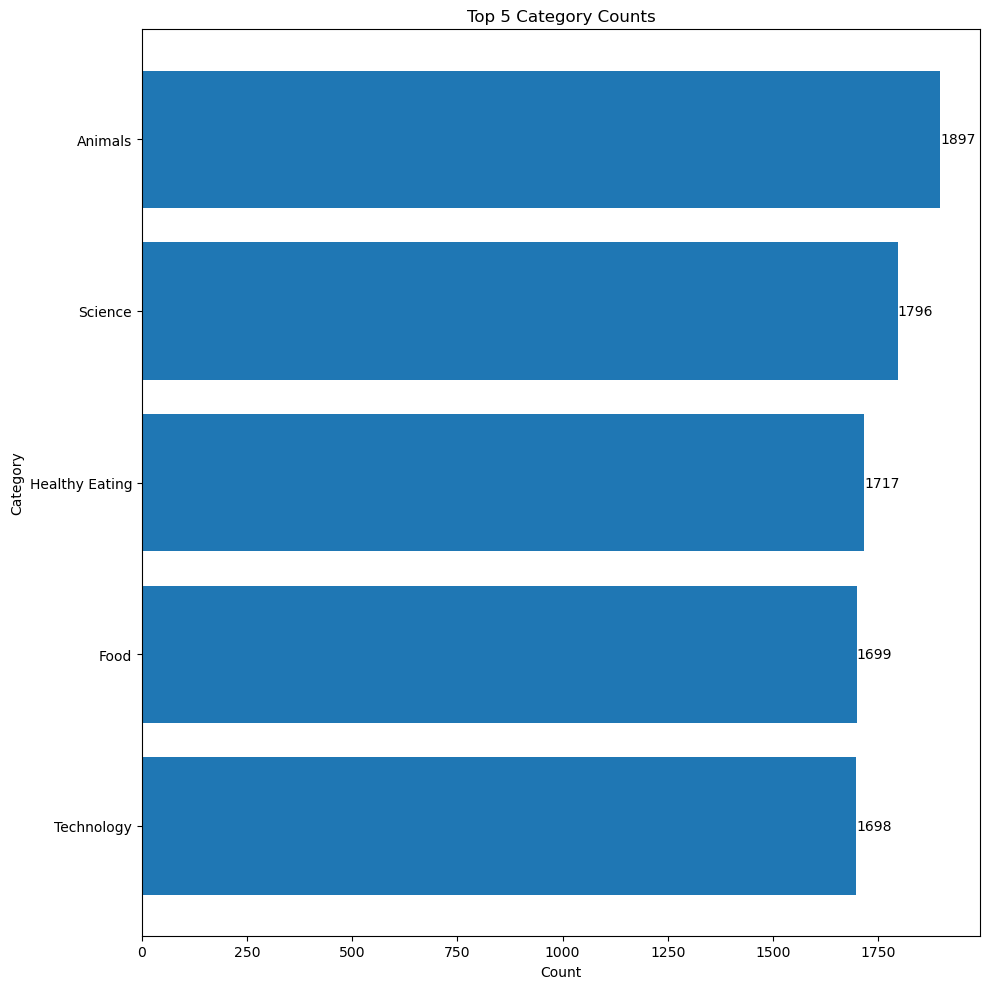

In [58]:
counter('Category', df)

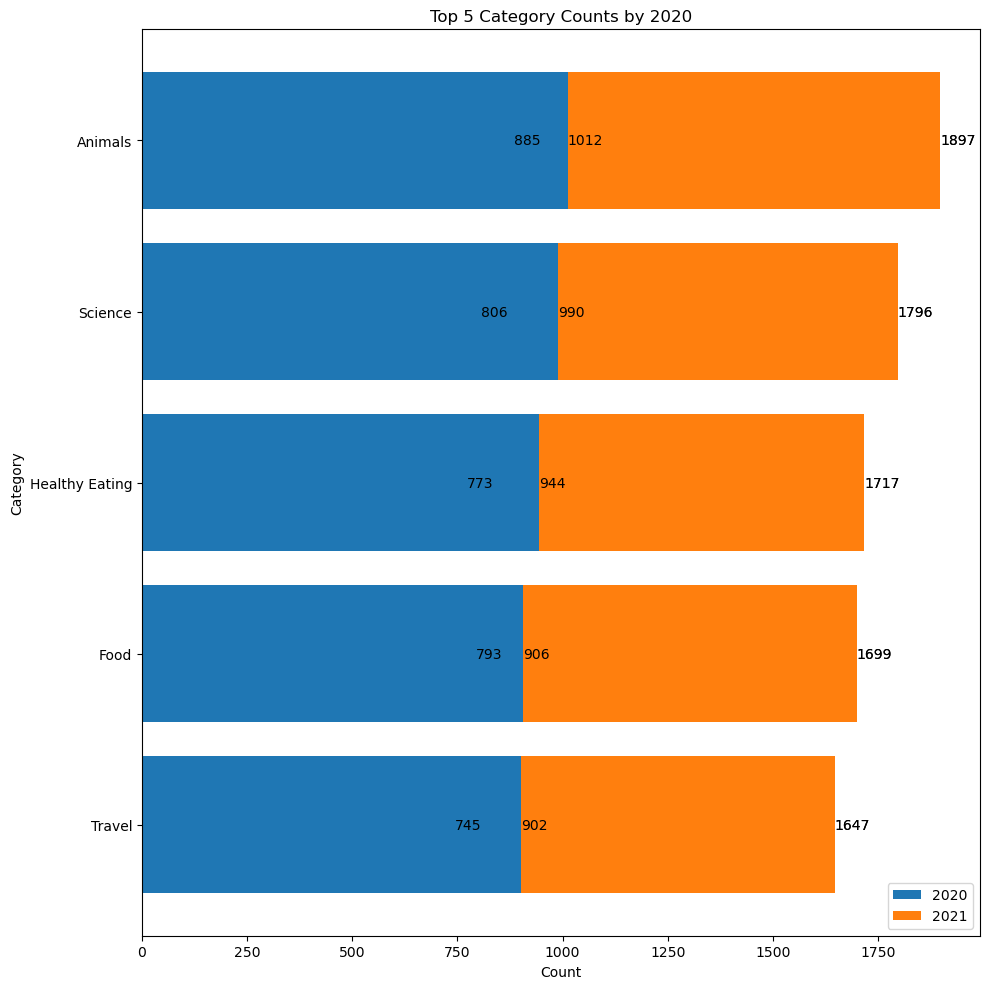

In [59]:
stack_bar_chart('Category', df, 2020)

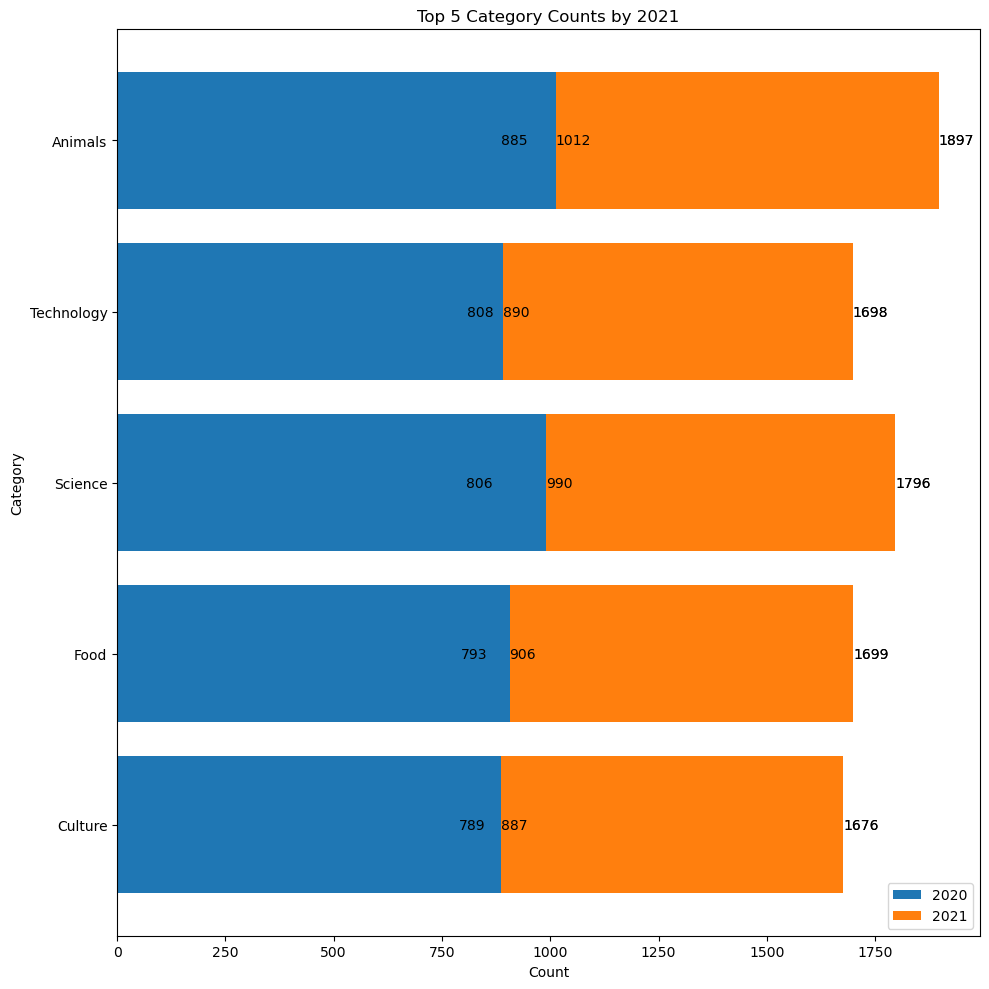

In [60]:
stack_bar_chart('Category', df, 2021)

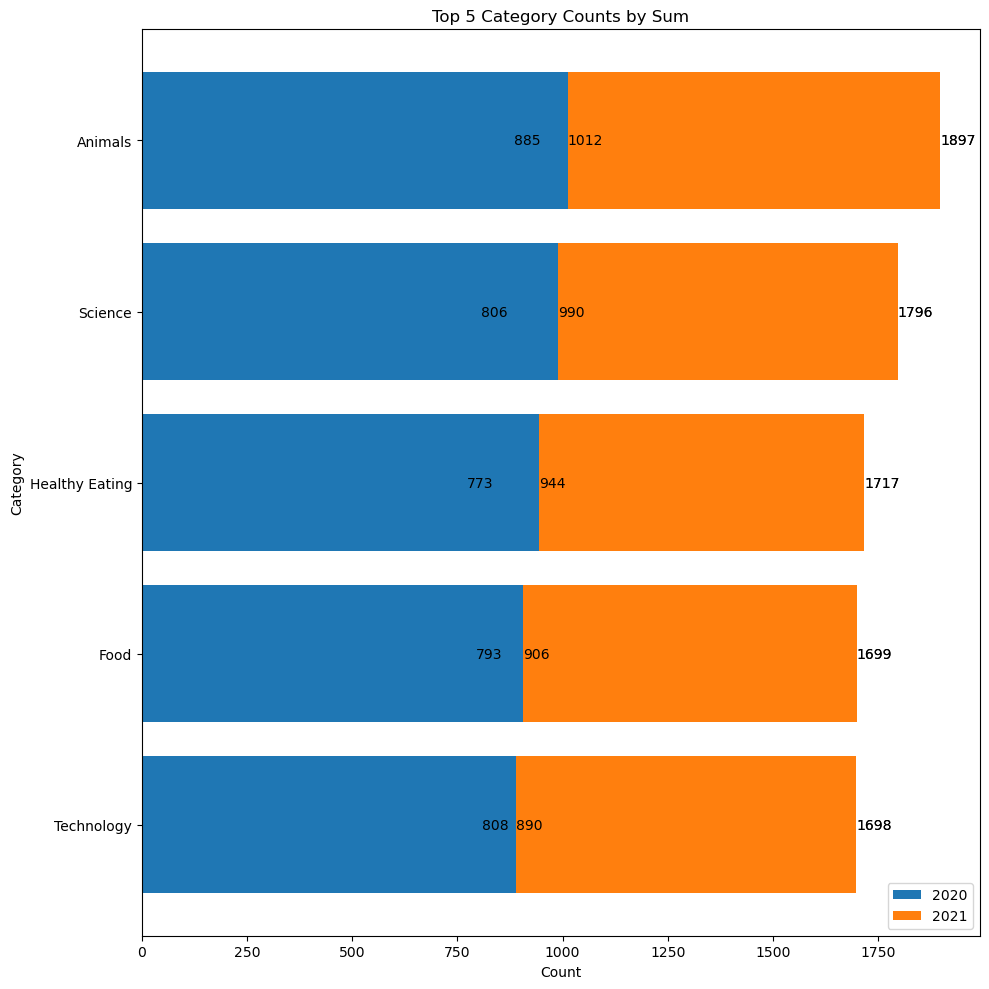

In [61]:
test = stack_bar_chart('Category', df, 'Sum')

Our top 5 overall categories are Animals, science, healthy eating, food, and technology. However when looking at by year trends we notice slight variations. 

2020 top categories

1) Animals
2) Science
3) Healthy Eating
4) Food
5) Travel

2021 top categories
1) Animals
2) Technology
3) Science
4) Food
5) Culture


## Count by month

In [62]:
_df = df
_df['Month'] = df['Datetime'].dt.strftime('%B')
_df.head(10)

,Content ID,Type_Reaction,Datetime,Type_Content,Category,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0,April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy Eating,negative,0,March
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy Eating,negative,0,August
5,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-14 07:21:32,video,Dogs,negative,0,January
6,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-13 23:35:56,video,Dogs,negative,0,January
7,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:20,video,Dogs,negative,0,February
8,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:22,photo,Public Speaking,negative,0,May
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-02-13 04:14:45,photo,Public Speaking,negative,0,February


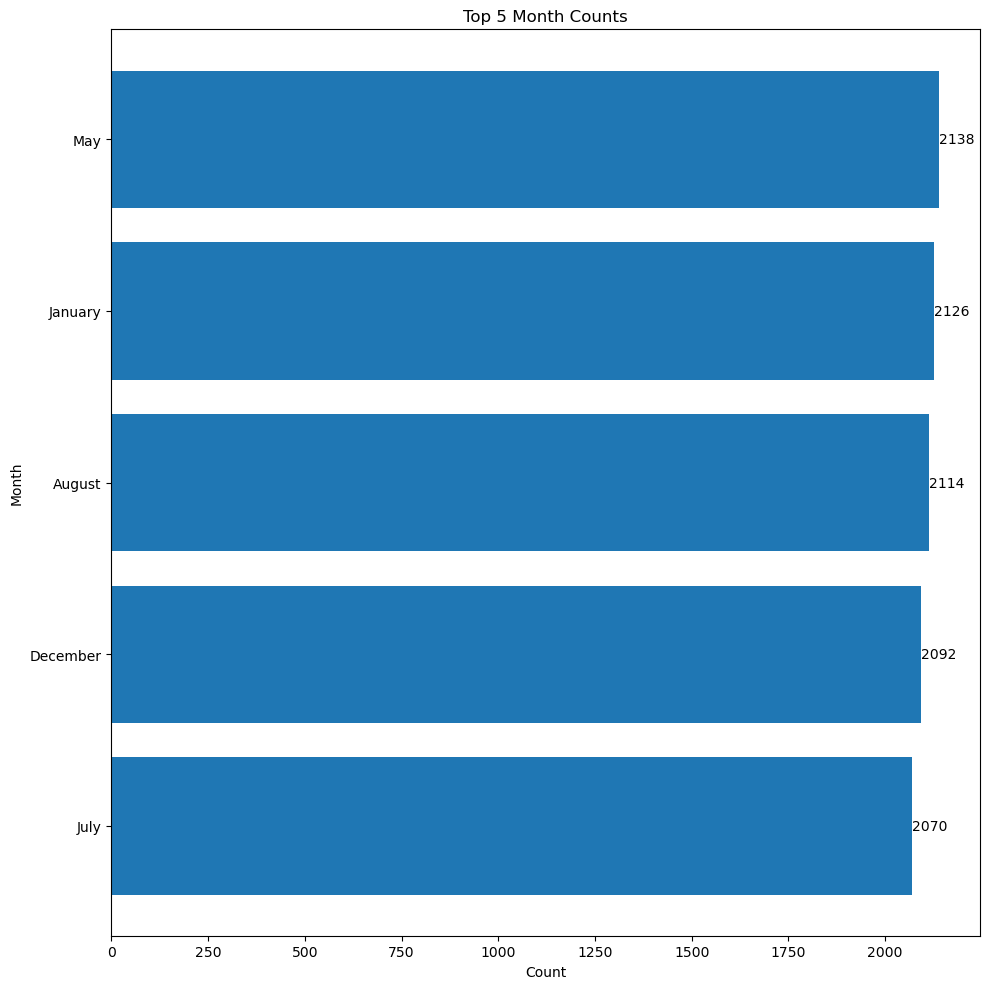

In [63]:
test= counter('Month', _df)

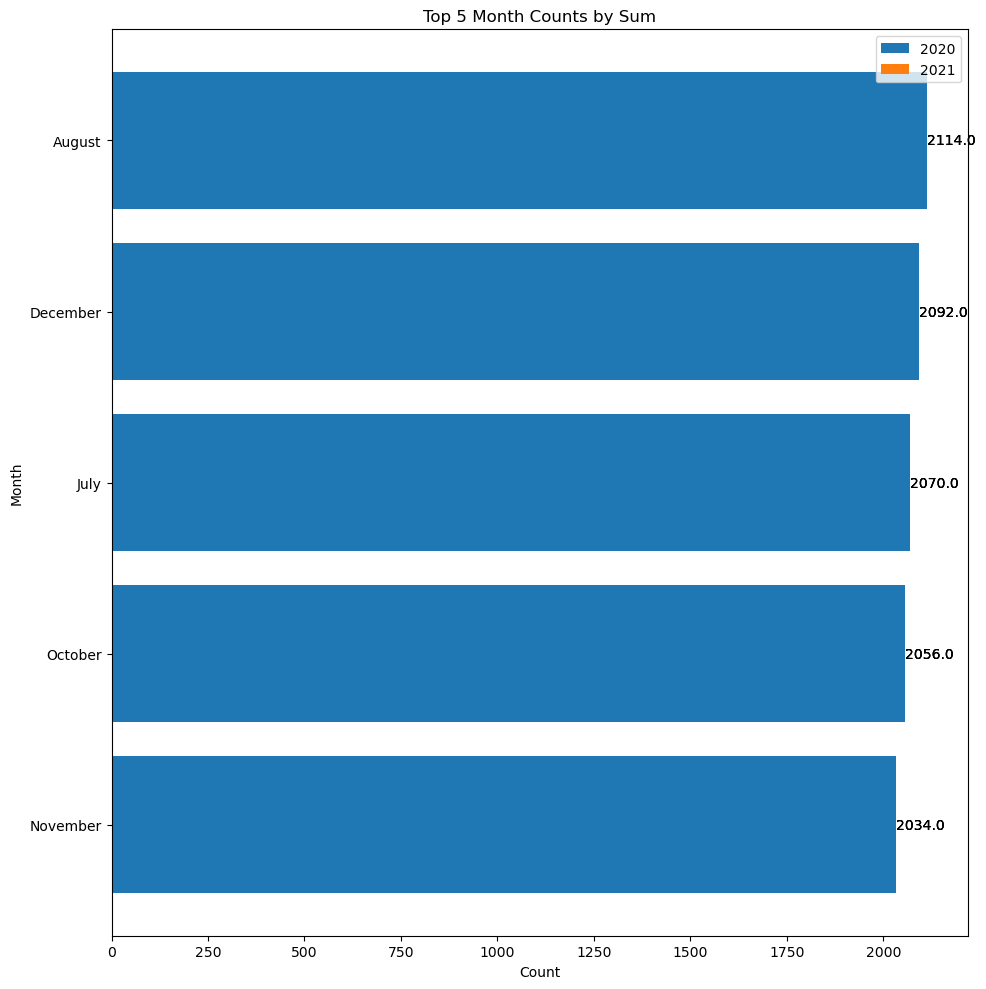

In [64]:
stack_bar_chart('Month', _df, 'Sum')

It appears that the month with the most post is May, but the difference is marginal. Additionally, it appears, our function is not combining out dataframe to include all months, so well do it manually with concatenation.

In [65]:
year_2020_counts = _df[_df['Datetime'].dt.year == 2020]['Month'].value_counts()

# Filter the DataFrame for the year 2021 and get the value counts for 'Month'
year_2021_counts = _df[_df['Datetime'].dt.year == 2021]['Month'].value_counts()

# Combine the two Series into a single DataFrame
result_df = pd.DataFrame({'2020': year_2020_counts, '2021': year_2021_counts})

# Fill NaN values with 0 if necessary
result_df = result_df.fillna(0)
result_df.reset_index(inplace=True)
# Display the result
result_df[['2020','2021']]=result_df[['2020','2021']].astype(int)
result_df

,Month,2020,2021
0,April,0,1974
1,August,2114,0
2,December,2092,0
3,February,0,1914
4,January,0,2126
5,July,2070,0
6,June,892,1129
7,March,0,2012
8,May,0,2138
9,November,2034,0


In [66]:
result_df.dtypes

Month    object
2020      int32
2021      int32
dtype: object

<Figure size 1600x1600 with 0 Axes>

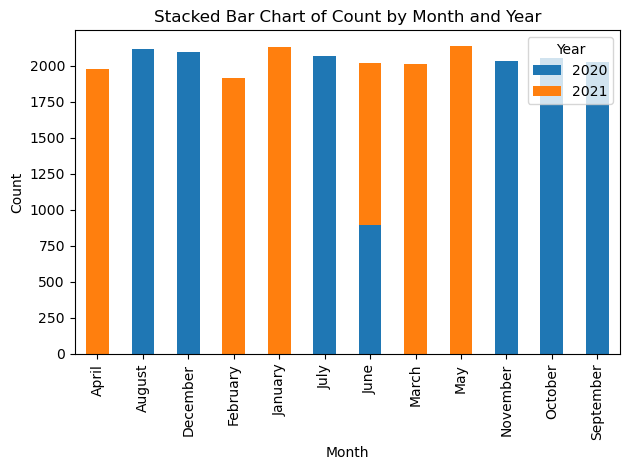

In [73]:


plt.figure(figsize=(16,16))
ax=result_df.plot(kind='bar', x='Month', stacked=True)


plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Count by Month and Year')


plt.legend(title='Year')
ax.set_xticklabels(result_df['Month'], rotation=90)

# Show the plot
plt.tight_layout()
plt.savefig('../Images/stacked_Month_year.png')
plt.show()



Because we have a discrepancy of missing months, I will look at the counts for our original dataset, so we know if our drop method is causing us to lose specific months.

In [68]:
_df = pd.read_csv('../Data/Reactions.csv',index_col=0,  parse_dates=['Datetime'])
_df['Month']= _df.loc[:, 'Datetime'].apply(lambda x: x.strftime('%B'))
_df['Year'] = _df.loc[:, ['Datetime']].apply(lambda x: x.dt.year)
display(_df.groupby(['Year', 'Month']).size().unstack(fill_value=0).T, result_df)
del _df


Year,2020,2021
Month,,
April,0,2065
August,2181,0
December,2178,0
February,0,1980
January,0,2218
July,2165,0
June,920,1178
March,0,2093
May,0,2217


,Month,2020,2021
0,April,0,1974
1,August,2114,0
2,December,2092,0
3,February,0,1914
4,January,0,2126
5,July,2070,0
6,June,892,1129
7,March,0,2012
8,May,0,2138
9,November,2034,0


After comparing it to our original dataset, we notice that there is indeed something wrong with our dates, we have entire months missing for each of years except for June. We will need to address the source of those issues. For now, because this is a mock project with no real stakeholders, we will work with the assumption that this is a data access issue. Realistically, another explanation is that this is sample data.

# Conclusion

After visualizing some of our data we identified the top overall categories (Both years) were:

1) Animals
2) Science
3) Healthy Eating
4) Food
5) Technology

However, as mentioned earlier, there were slight variations in the to categories when we segment the categories by year.

When evaluating user activity by month, we identified May, January, August, December, and July as our top months. However, the differences were marginal. We attempted to segment our data by months, but found our dataset did not encompass every month across the different years.
